<a href="https://colab.research.google.com/github/kridtapon/CTS-DPO-Power/blob/main/CTS_DPO_Power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.5/527.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.5 MB/s eta 0:00:00


In [30]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate the Chande Trend Score (CTS)
def calculate_cts(data, period=14):
    """
    Calculate the Chande Trend Score (CTS).
    """
    price_change = data['Close'].diff(periods=period)
    avg_price_change = price_change.rolling(window=period).mean()
    avg_true_range = data['High'].subtract(data['Low']).rolling(window=period).mean()
    trend_score = (avg_price_change / avg_true_range) * 100
    return trend_score

# Function to calculate the Detrended Price Oscillator (DPO)
def calculate_dpo(data, period=14):
    """
    Calculate the Detrended Price Oscillator (DPO).
    """
    sma = data['Close'].rolling(window=period).mean()
    dpo = data['Close'] - sma
    return dpo

# Define the stock symbol and time period
symbol = 'KKR'  # TPL BTC-USD AXON DECK HWM KKR
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Calculate CTS and DPO indicators
cts_period = 14  # Set your desired period for CTS
dpo_period = 14  # Set your desired period for DPO

df['CTS'] = calculate_cts(df, period=cts_period)
df['DPO'] = calculate_dpo(df, period=dpo_period)

# Define Entry and Exit signals based on CTS and DPO
df['Entry'] = (df['CTS'] > 30) & (df['DPO'] > 0)  # CTS above 30 and DPO positive
df['Exit'] = (df['CTS'] < -30) & (df['DPO'] < 0)  # CTS below -30 and DPO negative

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                            376506.38535
Total Return [%]                       276.506385
Benchmark Return [%]                   432.027355
Max Gross Exposure [%]                      100.0
Total Fees Paid                       5820.360449
Max Drawdown [%]                        42.009576
Max Drawdown Duration                       582.0
Total Trades                                   14
Total Closed Trades                            14
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            64.285714
Best Trade [%]                          52.198988
Worst Trade [%]                        -17.355623
Avg Winning Trade [%]                   22.902597
Avg Losing Trade [%]                    -8.075687


[*********************100%***********************]  1 of 1 completed


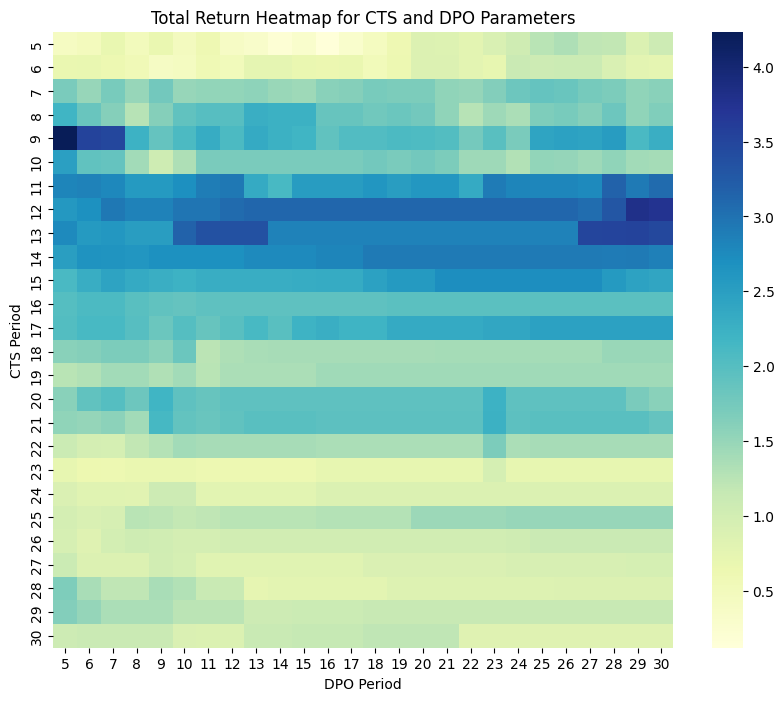

Best Parameters: CTS Period = 9, DPO Period = 5
Best Total Return: 4.233659488609661
Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                           523365.948861
Total Return [%]                       423.365949
Benchmark Return [%]                   432.027355
Max Gross Exposure [%]                      100.0
Total Fees Paid                      11285.413257
Max Drawdown [%]                        28.806756
Max Drawdown Duration                       257.0
Total Trades                                   21
Total Closed Trades                            21
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            61.904762
Best Trade [%]                          53.160507
Worst Trade [%]                        -11.354702
Avg Winning Tra

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



In [29]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate the Chande Trend Score (CTS)
def calculate_cts(data, period=14):
    price_change = data['Close'].diff(periods=period)
    avg_price_change = price_change.rolling(window=period).mean()
    avg_true_range = data['High'].subtract(data['Low']).rolling(window=period).mean()
    trend_score = (avg_price_change / avg_true_range) * 100
    return trend_score

# Function to calculate the Detrended Price Oscillator (DPO)
def calculate_dpo(data, period=14):
    sma = data['Close'].rolling(window=period).mean()
    dpo = data['Close'] - sma
    return dpo

# Define the stock symbol and time period
symbol = 'KKR' # TPL BTC-USD AXON DECK HWM KKR
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Define the range for parameter optimization
cts_period_range = range(5, 31)  # Chande Trend Score period from 5 to 30
dpo_period_range = range(5, 31)  # Detrended Price Oscillator period from 5 to 30

# Initialize a DataFrame to store the total return for each parameter combination
total_returns = pd.DataFrame(index=cts_period_range, columns=dpo_period_range)

# Loop through all combinations of CTS and DPO periods
for cts_period in cts_period_range:
    for dpo_period in dpo_period_range:
        # Calculate CTS and DPO with the current parameters
        df['CTS'] = calculate_cts(df, period=cts_period)
        df['DPO'] = calculate_dpo(df, period=dpo_period)

        # Define Entry and Exit signals based on CTS and DPO
        df['Entry'] = (df['CTS'] > 30) & (df['DPO'] > 0)  # CTS above 30 and DPO positive
        df['Exit'] = (df['CTS'] < -30) & (df['DPO'] < 0)  # CTS below -30 and DPO negative

        # Filter data for the test period (2020-2025)
        df_test = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

        # Backtest using vectorbt
        portfolio = vbt.Portfolio.from_signals(
            close=df_test['Close'],
            entries=df_test['Entry'],
            exits=df_test['Exit'],
            init_cash=100_000,
            fees=0.001
        )

        # Store the total return in the DataFrame
        total_returns.loc[cts_period, dpo_period] = portfolio.total_return()

# Plot heatmap of the total returns for each parameter combination
plt.figure(figsize=(10, 8))
sns.heatmap(total_returns.astype(float), annot=False, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title('Total Return Heatmap for CTS and DPO Parameters')
plt.xlabel('DPO Period')
plt.ylabel('CTS Period')
plt.show()

# Find the best parameters
best_params = total_returns.stack().idxmax()
best_return = total_returns.max().max()

print(f"Best Parameters: CTS Period = {best_params[0]}, DPO Period = {best_params[1]}")
print(f"Best Total Return: {best_return}")

# Re-run the backtest with the best parameters
df['CTS'] = calculate_cts(df, period=best_params[0])
df['DPO'] = calculate_dpo(df, period=best_params[1])
df['Entry'] = (df['CTS'] > 30) & (df['DPO'] > 0)
df['Exit'] = (df['CTS'] < -30) & (df['DPO'] < 0)

# Filter data for the test period (2020-2025)
df_test = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Backtest with the best parameters
portfolio = vbt.Portfolio.from_signals(
    close=df_test['Close'],
    entries=df_test['Entry'],
    exits=df_test['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()
